In [106]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d as plt3d
%matplotlib notebook 

In [107]:
# create valid markers from mpl.markers
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if item[1] != 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
blMods = [8192, 4096, 2048, 1024]

In [129]:
data = pd.read_csv('total.csv')[['type','x','degree','numTerms','blMod','workerProcessTask','oracleVerify','gasUsed']]

# remove outliers
for field in ['workerProcessTask','oracleVerify']:
    data = data[data.groupby(['type','x','degree','numTerms','blMod'])[field].\
      transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1)]
data = data.groupby(['type','x','degree','numTerms','blMod']).mean().reset_index()

# NORMAL

0.004301533268136557


/home/yung/.local/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/yung/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<IPython.core.display.Javascript object>


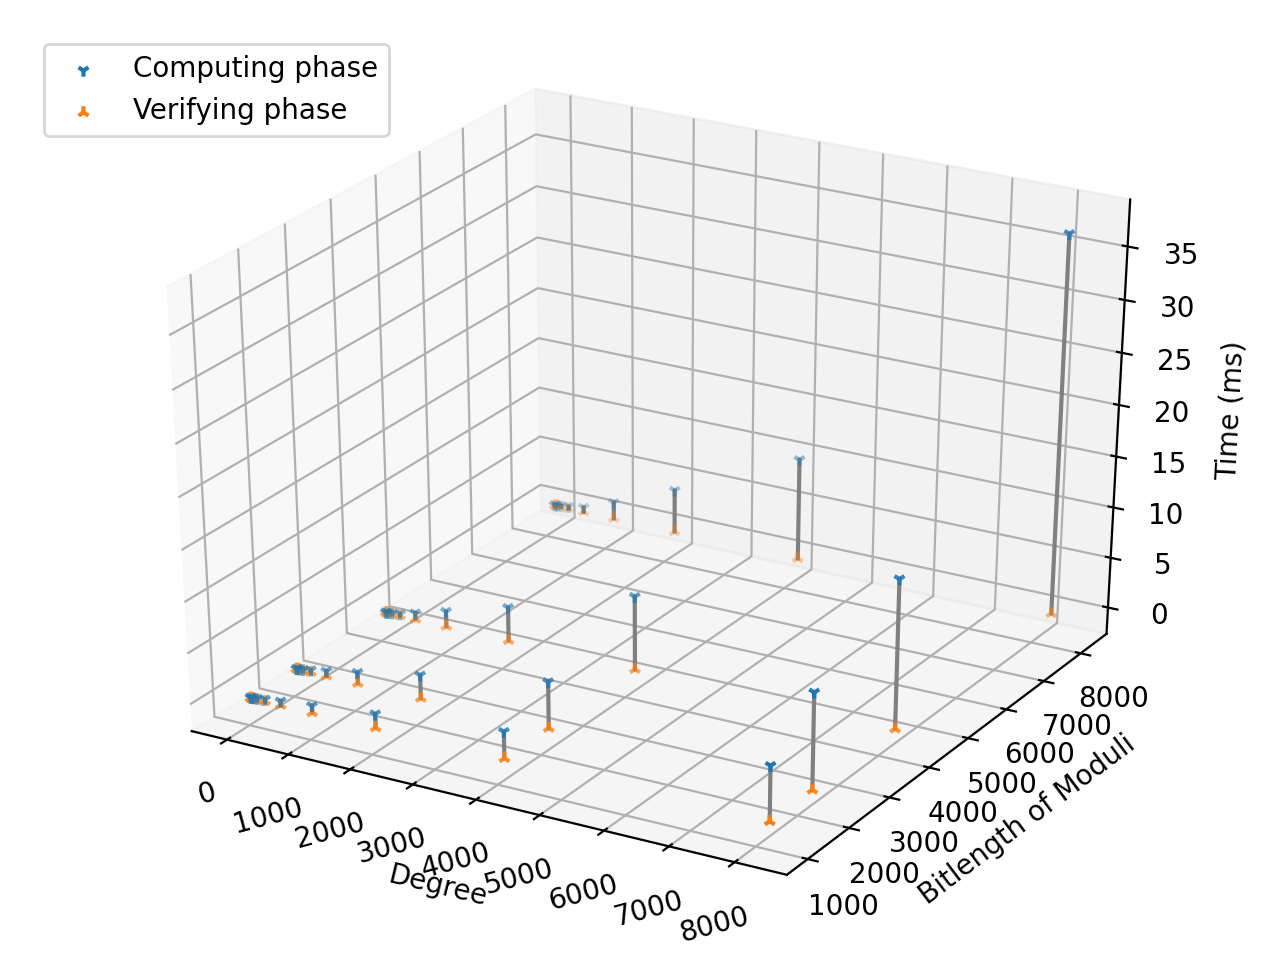

<IPython.core.display.Javascript object>


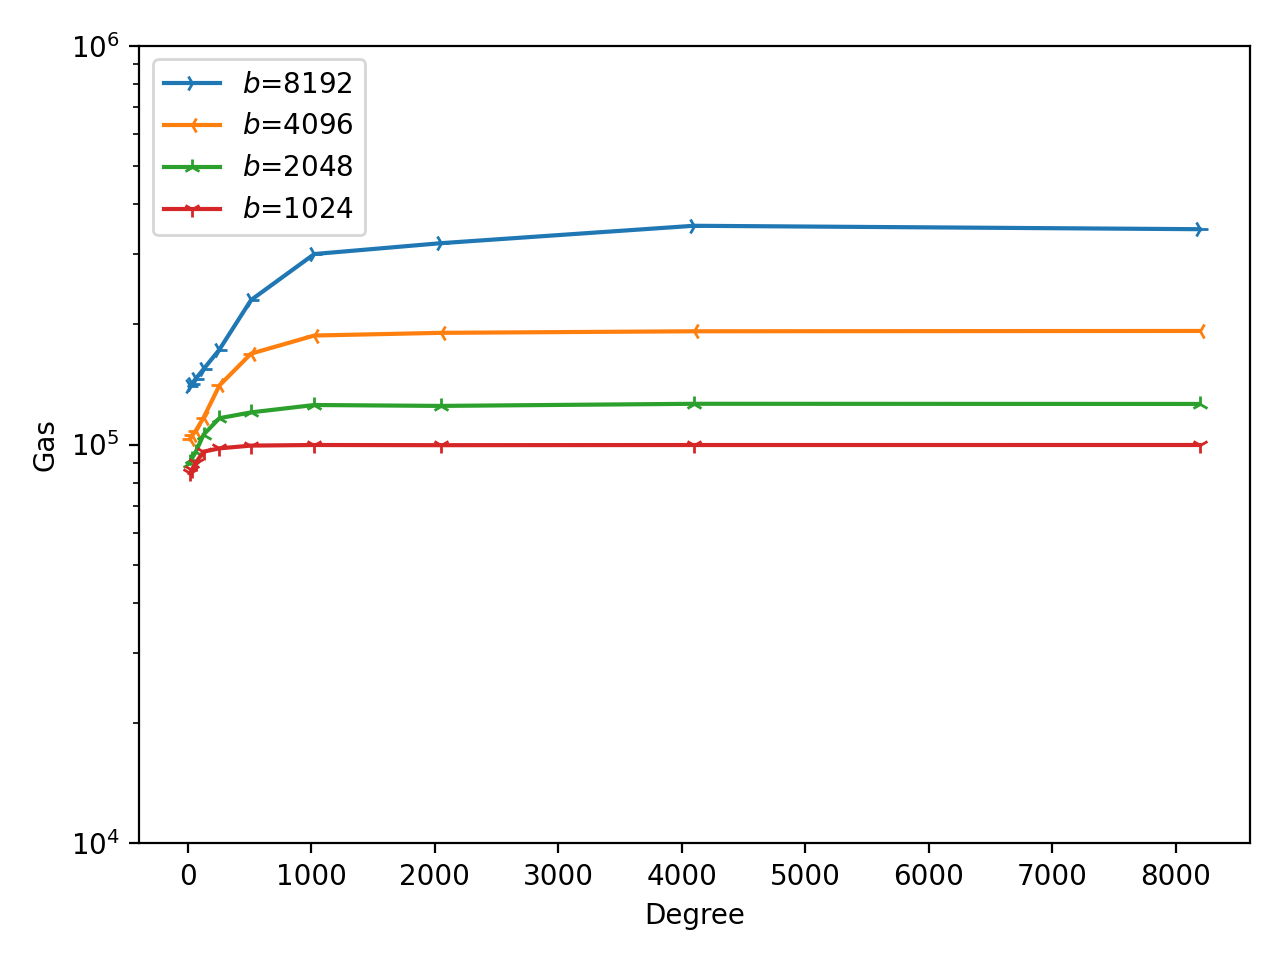

In [109]:
ldata = data[data['type']=='NORMAL']

markers=['1','2','3','4']
# colors=['r','g','b','o']


ldata.loc[:,'Computing Phase'] = ldata['workerProcessTask']/1e6
ldata.loc[:,'Verifying Phase'] = ldata['oracleVerify']/1e6
print(ldata['Verifying Phase'].mean())

ax = plt.figure().gca(projection='3d')
ax.scatter(ldata['degree'], ldata['blMod'], ldata['Computing Phase'], marker='1')
ax.scatter(ldata['degree'], ldata['blMod'], ldata['Verifying Phase'], marker='2')
ax.legend([u'Computing phase',u'Verifying phase'], loc="upper left")

for row in ldata.iterrows():
    row = row[1]
    ax.add_line(plt3d.art3d.Line3D((row['degree'], row['degree']), (row['blMod'], row['blMod']), (0, row['Computing Phase']), c="grey", ls='-'))

ax.set_xlabel('Degree')
# ax.set_xscale('log')
ax.set_ylabel('Bitlength of Moduli')
# ax.set_yscale('log')
ax.set_zlabel('Time (ms)')
for tick in ax.get_xticklabels():
    tick.set_rotation(15)
plt.show()
plt.tight_layout()
plt.savefig('normal_time.pdf')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_ylim([1e4, 1e6])
marker = ['1','2','3','4']
for blMod in blMods:
    ldata[ldata['blMod']==blMod].plot('degree', 'gasUsed', ax=ax, marker=marker.pop(), label="$b$=%d"%blMod)
ax.set_xlabel('Degree')
ax.set_ylabel('Gas')
plt.tight_layout()
plt.savefig('normal_gas.pdf')


# SPARSE

In [ ]:
ldata = data[data['type']=='SPARSE']

markers=['1','2','3','4']*9
# colors=['r','g','b']*9
ldata.loc[:,'Term / Degree'] = ldata['numTerms']/ldata['degree']
for degree in [100,1000,10000]:
    dldata = ldata[ldata['degree']==degree][['blMod','degree','Term / Degree','workerProcessTask','oracleVerify','gasUsed']]
    dldata.loc[:,'Computing Phase'] = dldata['workerProcessTask']/1e6
    dldata.loc[:,'Verifying Phase'] = dldata['oracleVerify']/1e6
    ax = plt.figure().gca(projection='3d')
    ax.scatter(dldata['Term / Degree'], dldata['blMod'], dldata['Computing Phase'], marker='1')
    ax.scatter(dldata['Term / Degree'], dldata['blMod'], dldata['Verifying Phase'], marker='2')
    ax.legend(['Computing Phase', 'Verifying Phase'])
    for row in dldata.iterrows():
        row = row[1]
        ax.add_line(plt3d.art3d.Line3D(
            (row['Term / Degree'], row['Term / Degree']), 
            (row['blMod'], row['blMod']), 
            (0, row['Computing Phase']), c="grey", ls='-'))
    ax.set_xlabel('Number of Terms / Degree')
    ax.set_ylabel('Bitlength of Moduli')
    ax.set_ylabel('Time (ms)')
    plt.show()

markers = []+valid_markers
fig = plt.figure()
ax = fig.add_subplot(111)
for blMod in blMods:
    bldata = ldata[ldata['blMod']==blMod]
    for degree in [10000, 1000, 100]:
        bdldata = bldata[bldata['degree']==degree]
        bdldata.plot('Term / Degree', 'gasUsed', marker=markers.pop(), label='$b$=%d, Degree=%d'%(blMod,degree), ax=ax)
ax.legend(ncol=2, loc='best')
ax.set_yscale('log')
ax.set_ylim([5e4, 1e6])
ax.set_xlabel('Number of Terms / Degree')
ax.set_ylabel('Gas')

/home/yung/.local/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/yung/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<IPython.core.display.Javascript object>


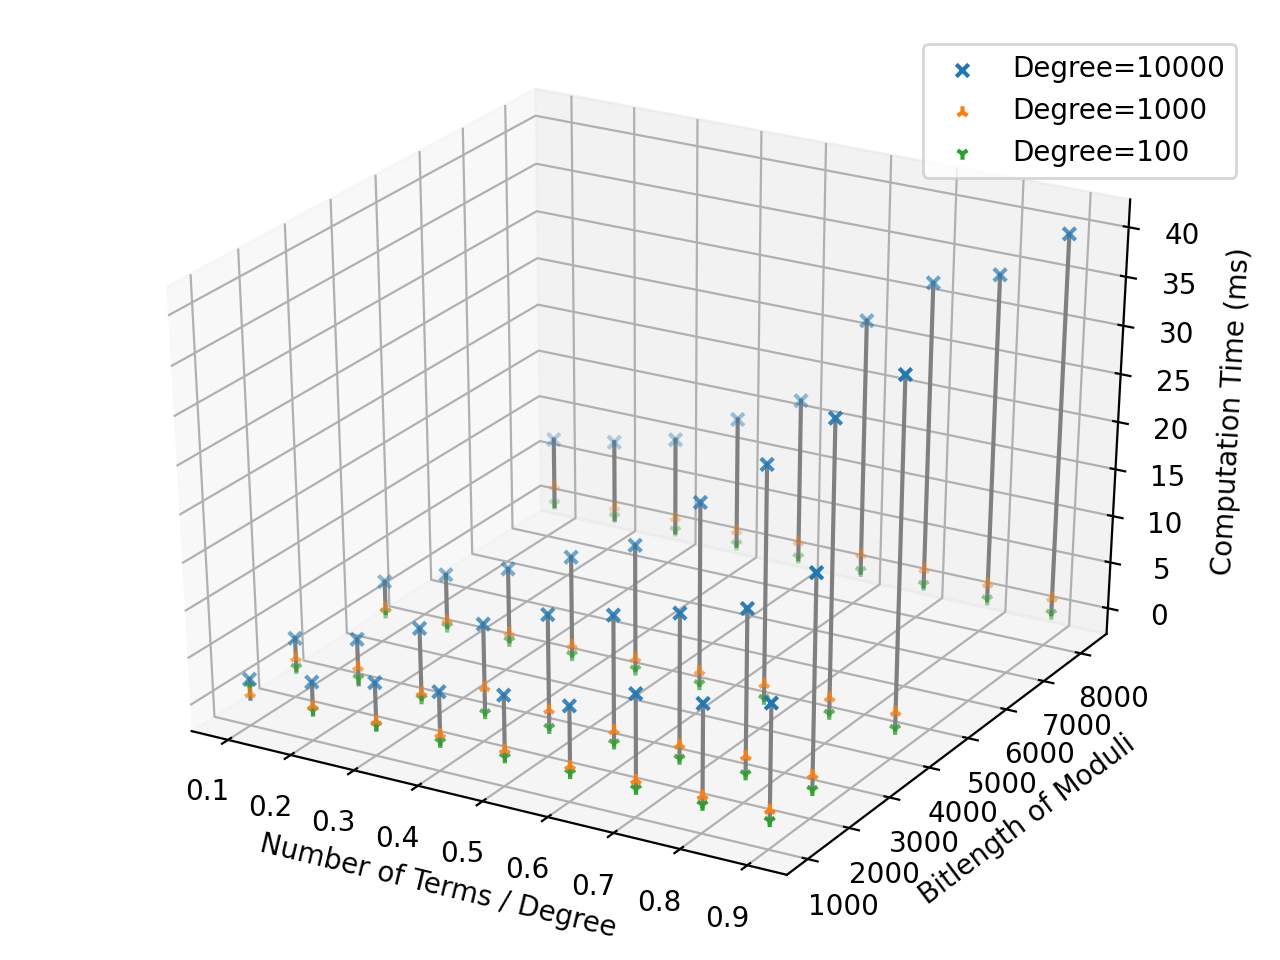

<IPython.core.display.Javascript object>


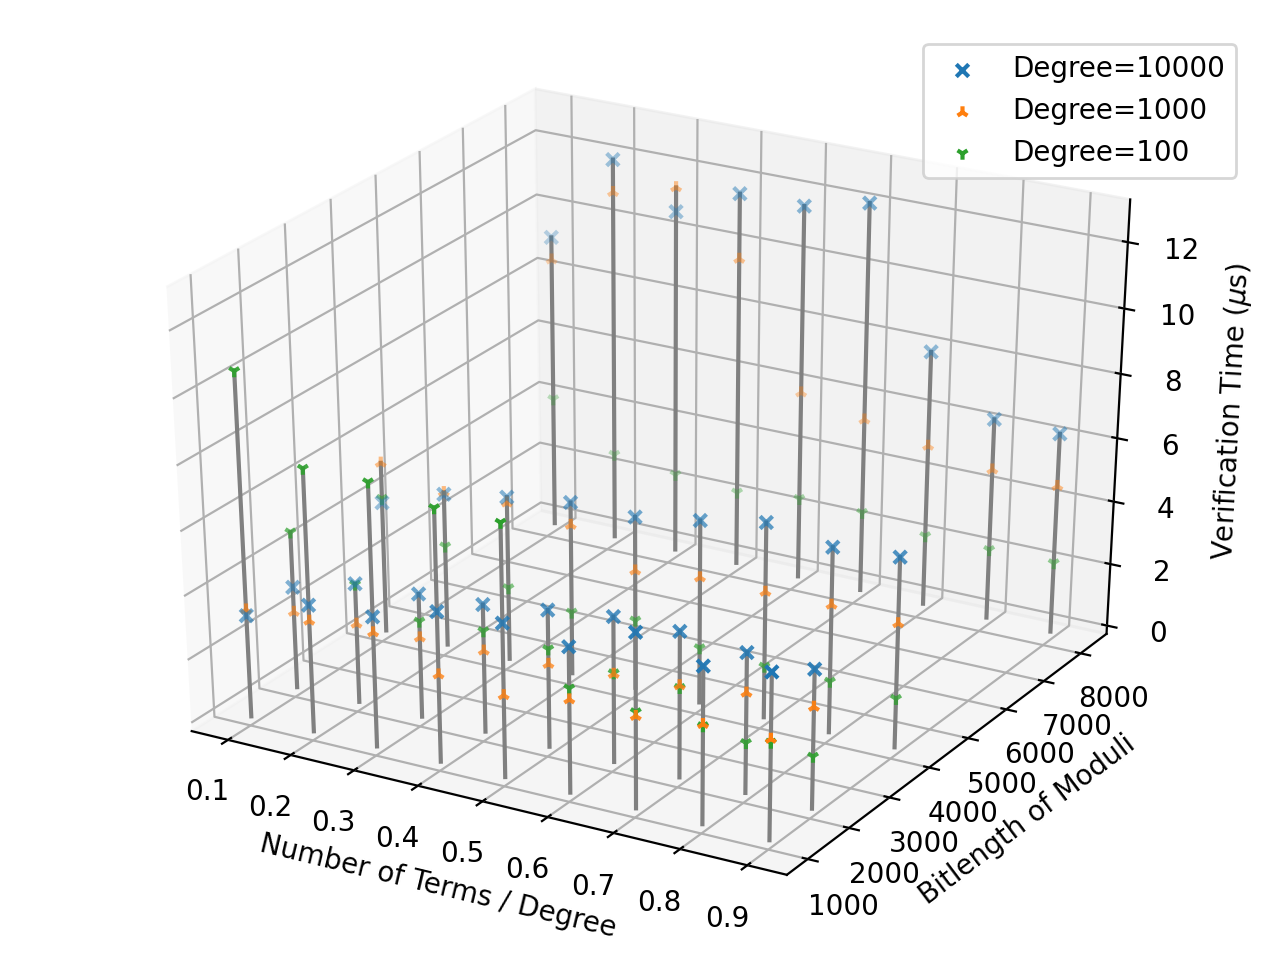

<IPython.core.display.Javascript object>


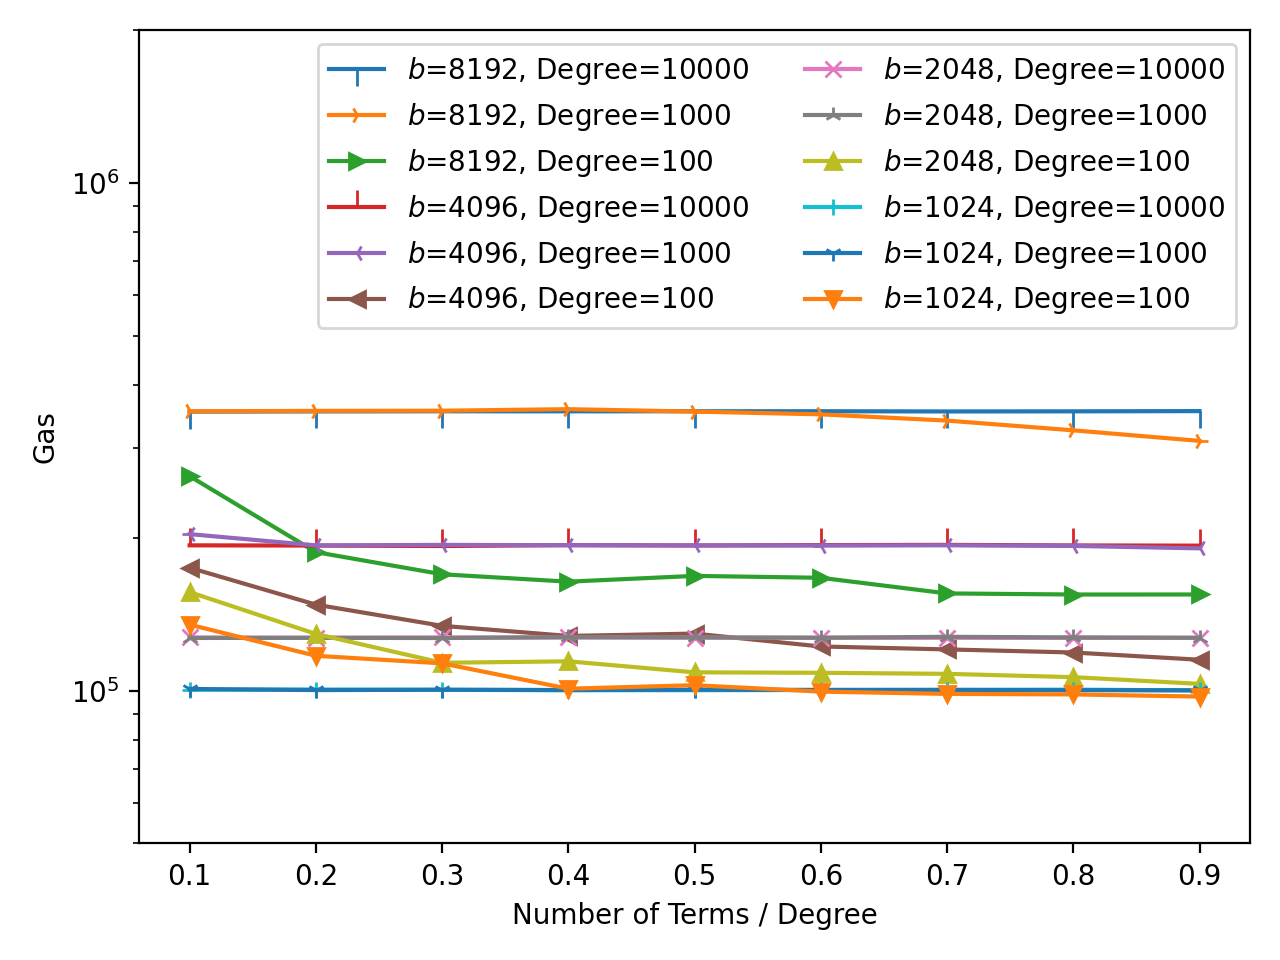

In [130]:
ldata = data[data['type']=='SPARSE']

markers=['1','2','3','4']*9
# colors=['r','g','b']*9
ldata.loc[:,'Term / Degree'] = ldata['numTerms']/ldata['degree']
ldata.loc[:,'Computing Phase'] = ldata['workerProcessTask']/1e6
ldata.loc[:,'Verifying Phase'] = ldata['oracleVerify']/1e3


ax = plt.figure().gca(projection='3d')
markers = ['1', '2', 'x']
for degree in [10000, 1000, 100]:
    dldata = ldata[ldata['degree']==degree][['blMod','degree','Term / Degree','Computing Phase','Verifying Phase','gasUsed']]
    ax.scatter(dldata['Term / Degree'], dldata['blMod'], dldata['Computing Phase'], marker=markers.pop())
ax.legend(['Degree=10000',
                 'Degree=1000',
                 'Degree=100'])
for row in ldata[ldata['degree']==10000].iterrows():
    row = row[1]
    ax.add_line(plt3d.art3d.Line3D(
        (row['Term / Degree'], row['Term / Degree']), 
        (row['blMod'], row['blMod']), 
        (0, row['Computing Phase']), c="grey", ls='-'))
ax.set_xlabel('Number of Terms / Degree')
ax.set_ylabel('Bitlength of Moduli')
ax.set_zlabel('Computation Time (ms)')
plt.show()
plt.tight_layout()
plt.savefig('sparse_compute.pdf')


ax = plt.figure().gca(projection='3d')
markers = ['1', '2', 'x']
for degree in [10000, 1000, 100]:
    dldata = ldata[ldata['degree']==degree][['blMod','degree','Term / Degree','Computing Phase','Verifying Phase','gasUsed']]
    ax.scatter(dldata['Term / Degree'], dldata['blMod'], dldata['Verifying Phase'], marker=markers.pop())
ax.legend(['Degree=10000',
                 'Degree=1000',
                 'Degree=100'])
maximum = ldata.groupby(['Term / Degree', 'blMod']).max()['Verifying Phase'].reset_index()
for row in maximum.iterrows():
    row = row[1]
    ax.add_line(plt3d.art3d.Line3D(
        (row['Term / Degree'], row['Term / Degree']), 
        (row['blMod'], row['blMod']), 
        (0, row['Verifying Phase']), c="grey", ls='-'))
ax.set_zlim([0, 13])
ax.set_xlabel('Number of Terms / Degree')
ax.set_ylabel('Bitlength of Moduli')
ax.set_zlabel('Verification Time ($\mu$s)')
plt.show()
plt.tight_layout()
plt.savefig('sparse_verify.pdf')


markers = ['v','1','+',
           '^','2','x',
           '<','3',2,
           '>','4',3]
fig = plt.figure()
ax = fig.add_subplot(111)
for blMod in blMods:
    bldata = ldata[ldata['blMod']==blMod]
    for degree in [10000, 1000, 100]:
        bdldata = bldata[bldata['degree']==degree]
        bdldata.plot('Term / Degree', 'gasUsed', marker=markers.pop(), label='$b$=%d, Degree=%d'%(blMod,degree), ax=ax)
ax.legend(ncol=2, loc='best')
ax.set_yscale('log')
ax.set_ylim([5e4, 2e6])
ax.set_xlabel('Number of Terms / Degree')
ax.set_ylabel('Gas')
plt.tight_layout()
plt.savefig('sparse_gas.pdf')


# MULTIVAR

/home/yung/.local/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/yung/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<IPython.core.display.Javascript object>


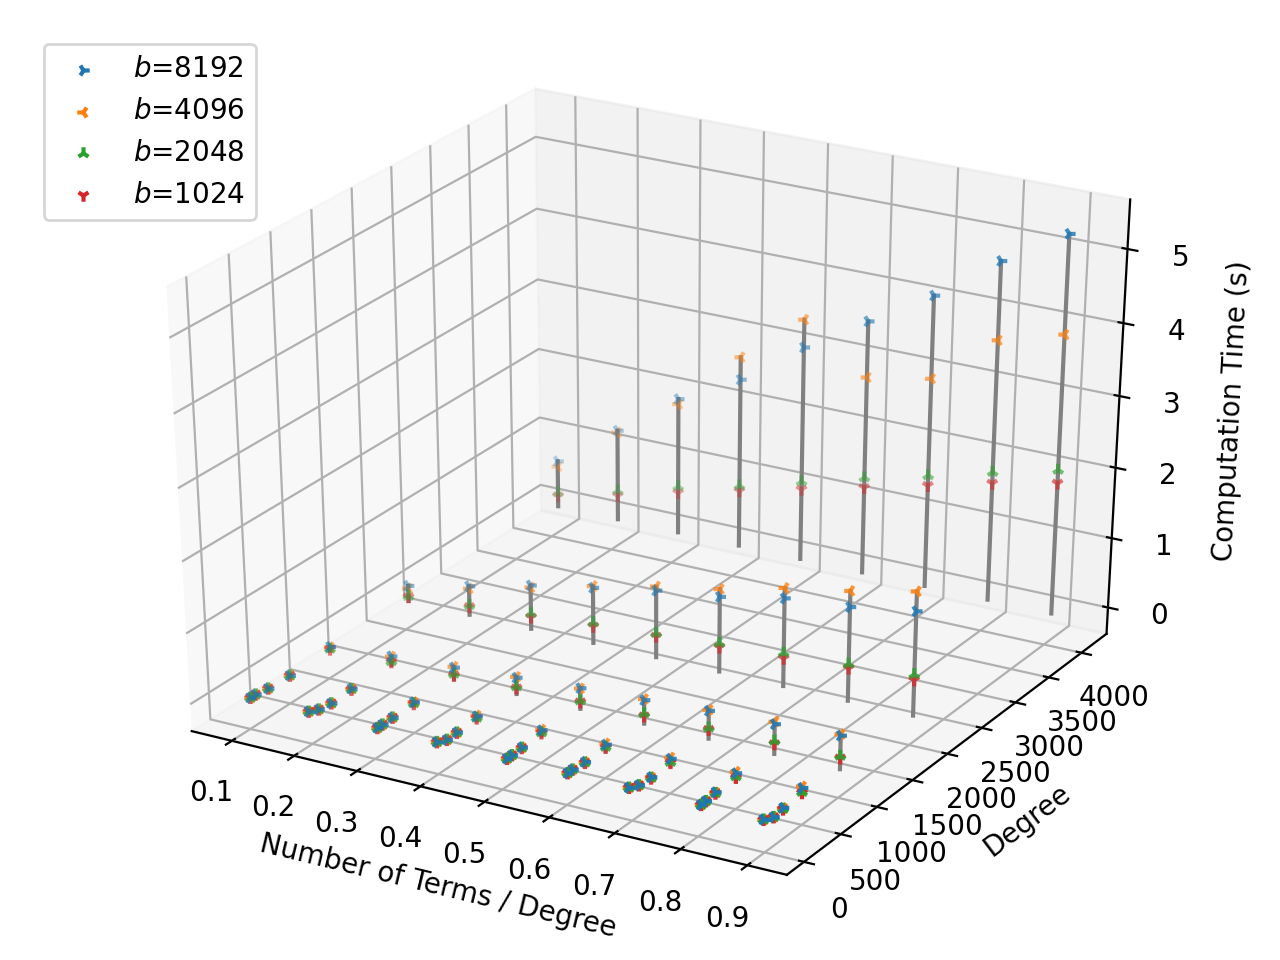

<IPython.core.display.Javascript object>


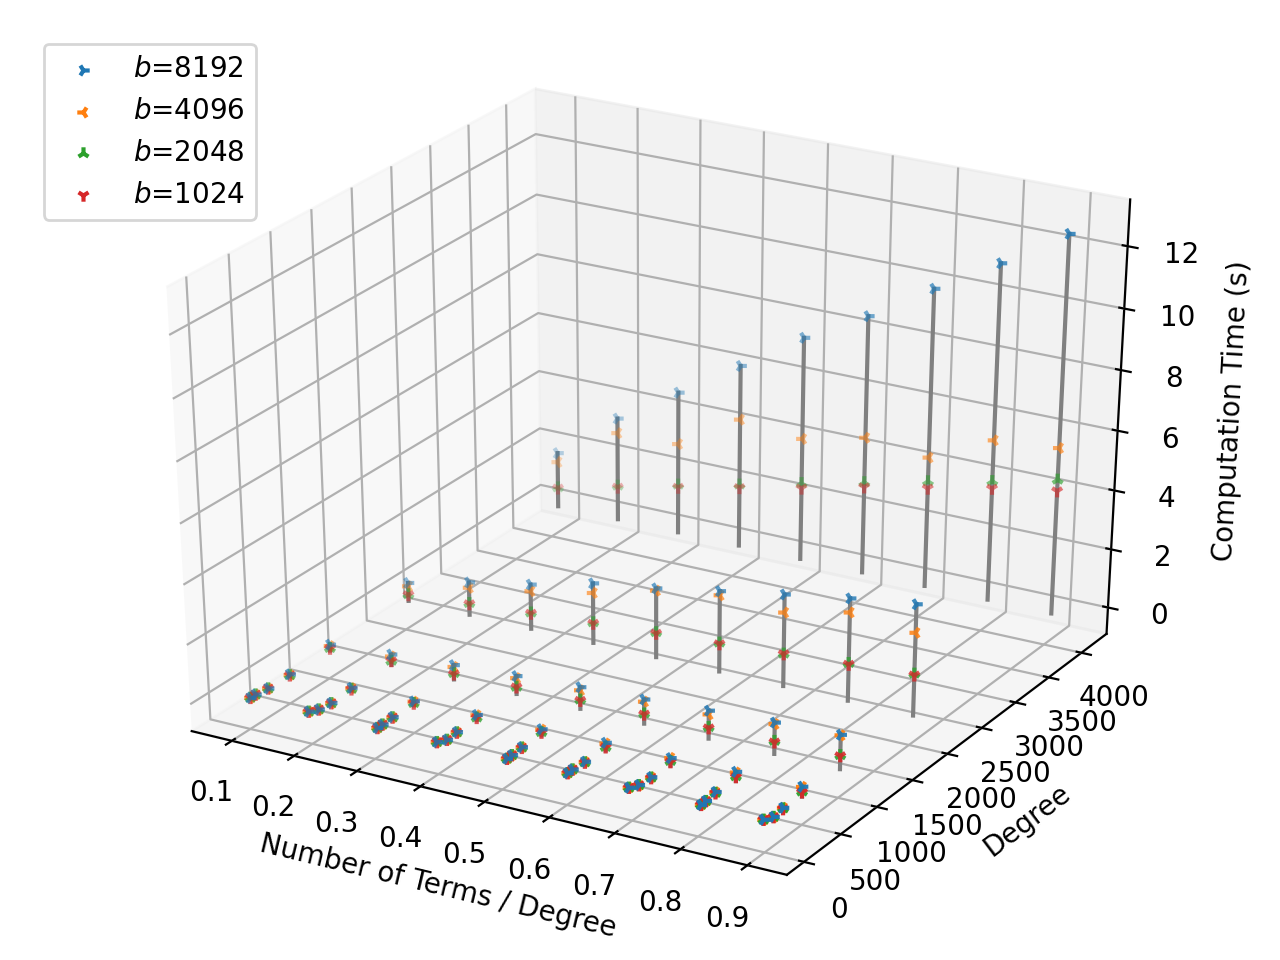

<IPython.core.display.Javascript object>


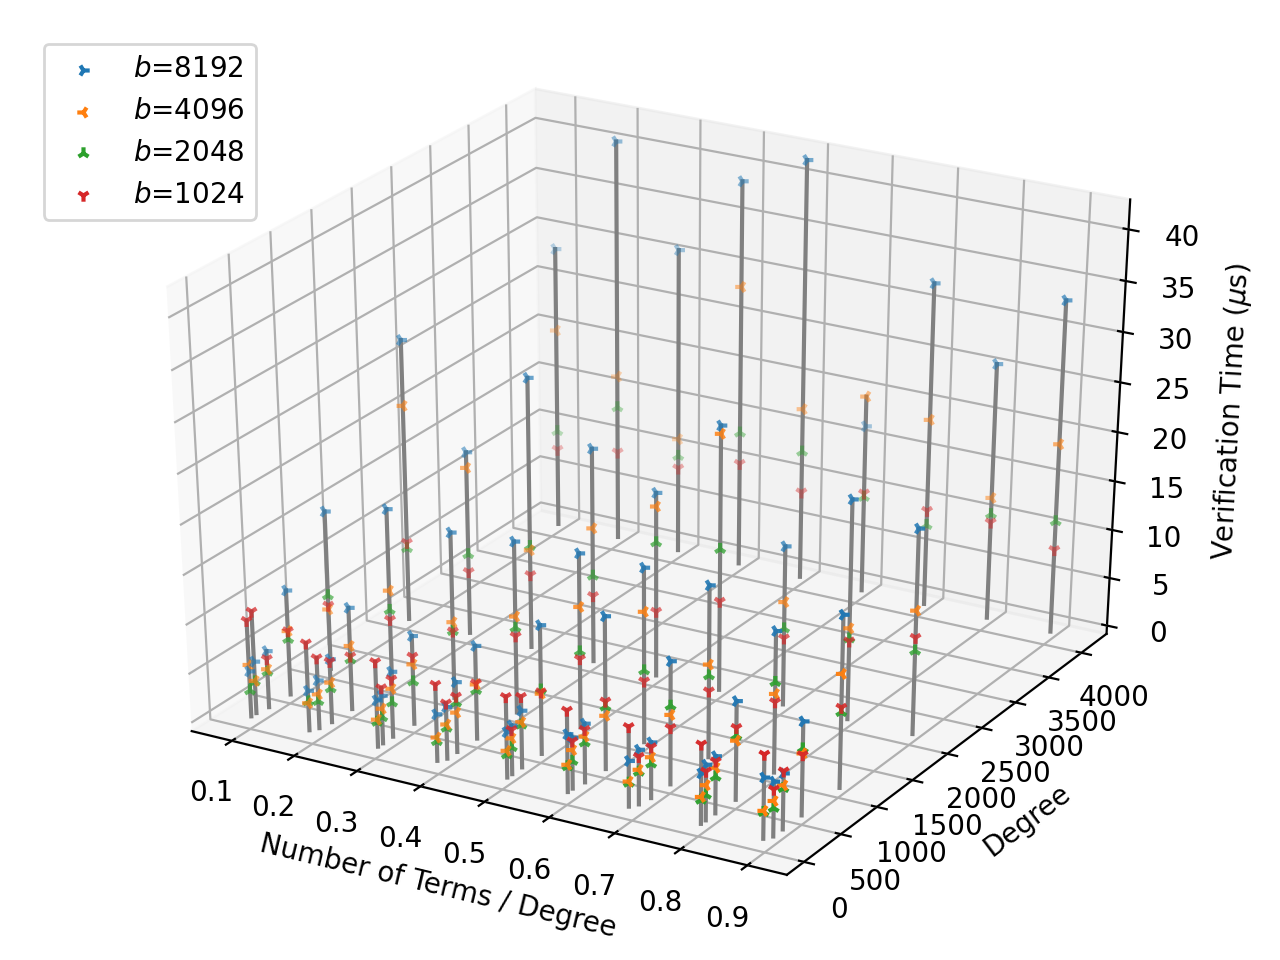

<IPython.core.display.Javascript object>


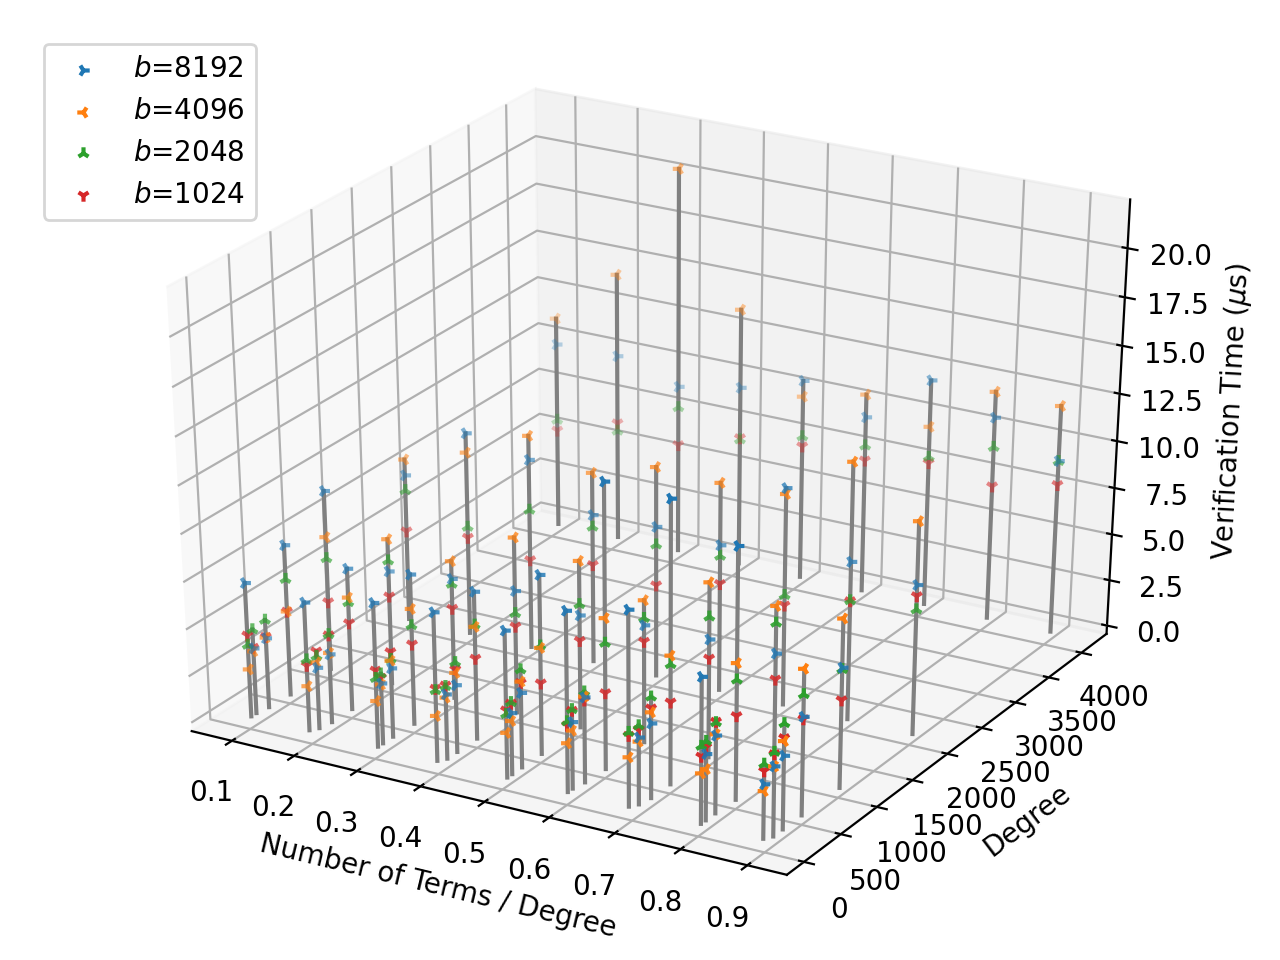

<IPython.core.display.Javascript object>


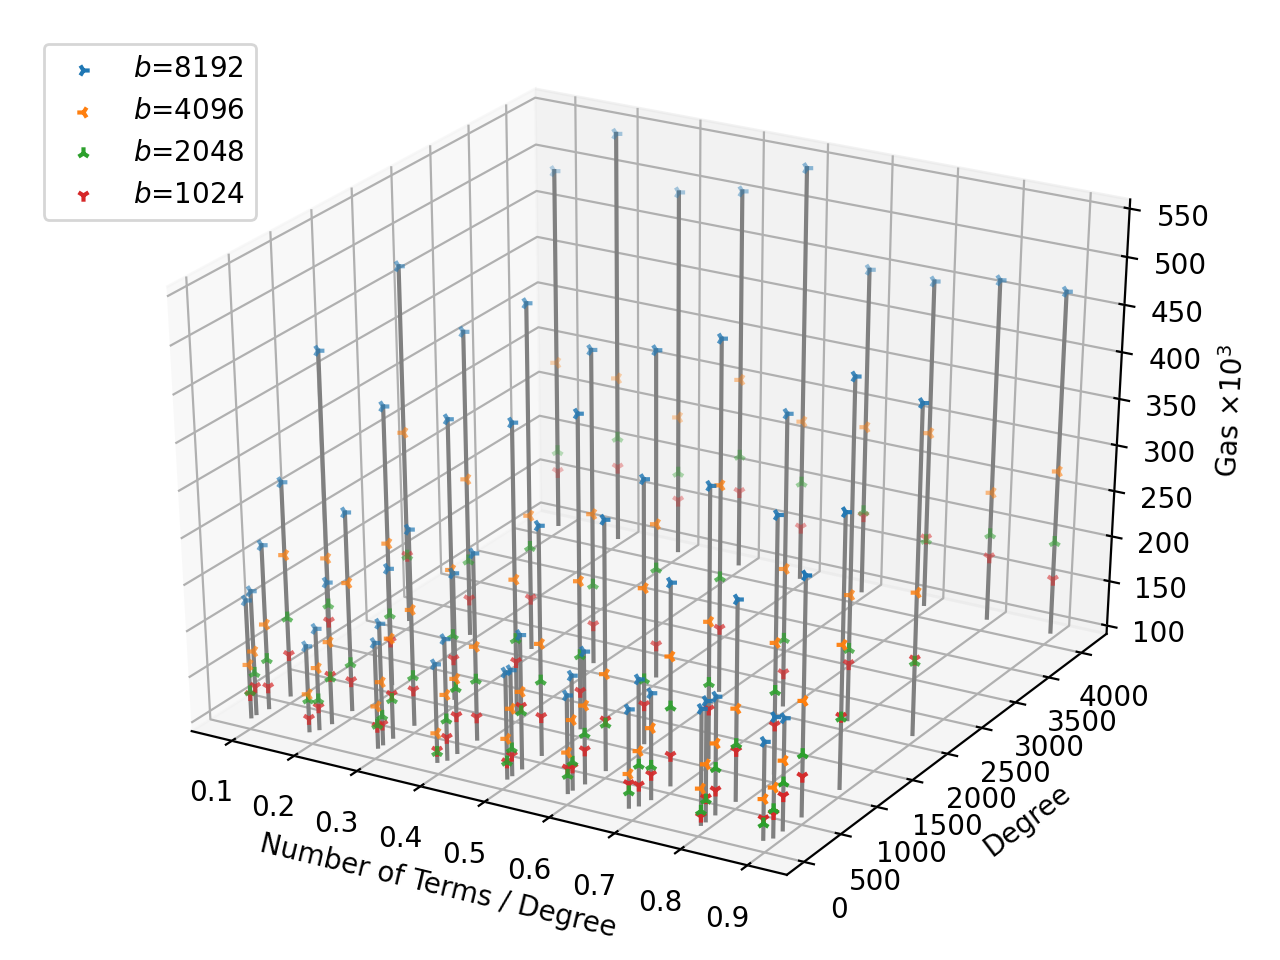

<IPython.core.display.Javascript object>


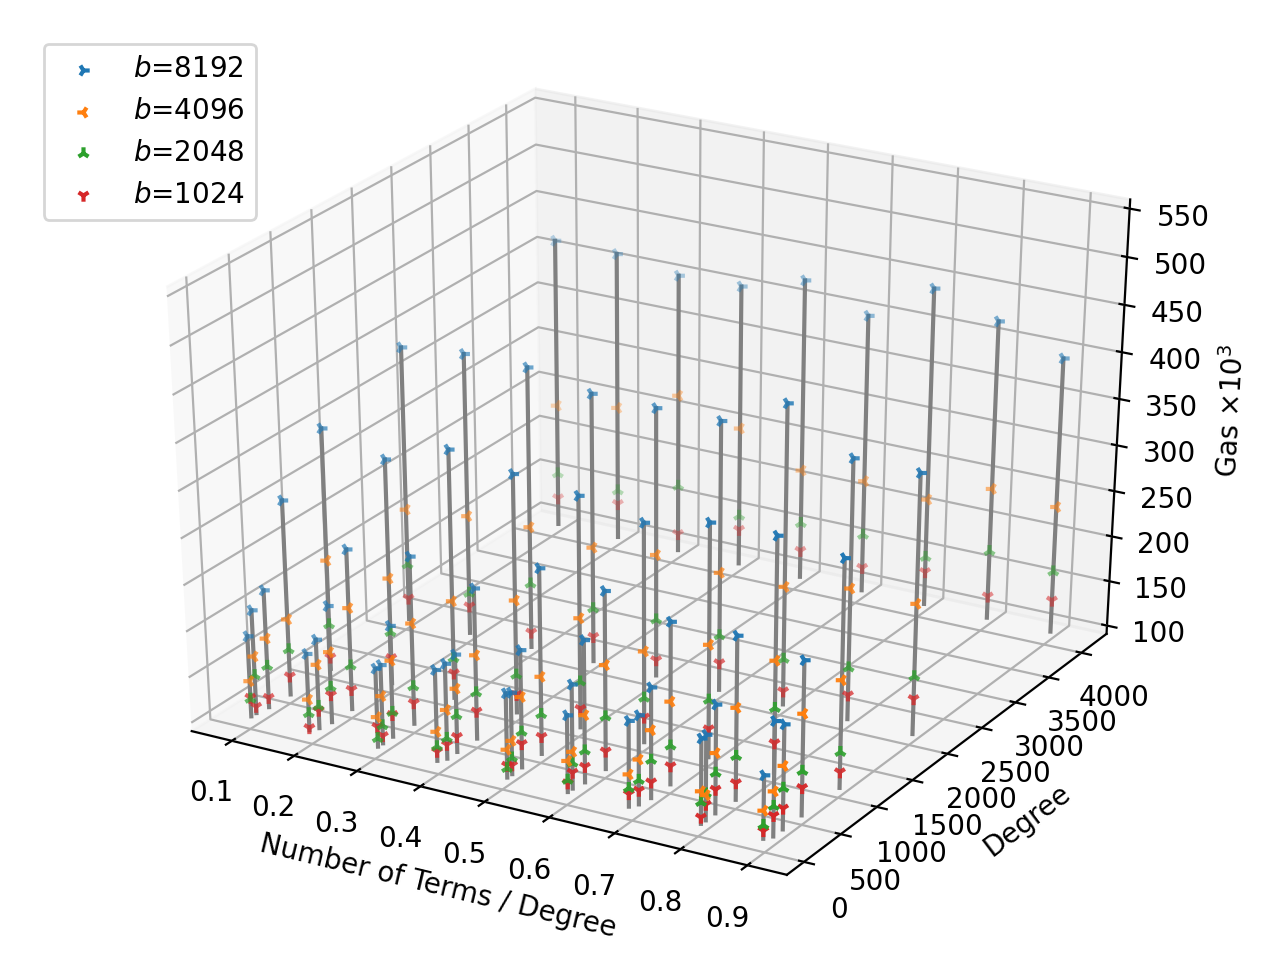

In [136]:
ldata = data[data['type']=='MULTIVAR']
ldata.loc[:,'Term / Degree'] = ldata['numTerms']/ldata['degree']
ldata.loc[:,'Computing Phase'] = ldata['workerProcessTask']/1e9
ldata.loc[:,'Verifying Phase'] = ldata['oracleVerify']/1e3
ldata.loc[:,'gasUsed'] = ldata['gasUsed']/1e3
for v in [2,4]:
    markers = ['1','2','3','4']
    vldata = ldata[ldata['x']==v]
    ax = plt.figure().gca(projection='3d')
    for blMod in blMods:
        bvldata = vldata[vldata['blMod']==blMod]
        ax.scatter(bvldata['Term / Degree'], bvldata['degree'], bvldata['Computing Phase'], marker=markers.pop(), label='$b$=%d'%blMod)
    ax.legend(loc='upper left')
    ax.set_xlabel('Number of Terms / Degree')
    ax.set_ylabel('Degree')
    ax.set_zlabel('Computation Time (s)')
    maximum = vldata.groupby(['degree', 'Term / Degree']).max()['Computing Phase'].reset_index()
    for row in maximum.iterrows():
        row = row[1]
        ax.add_line(plt3d.art3d.Line3D(
            (row['Term / Degree'], row['Term / Degree']), 
            (row['degree'], row['degree']), 
            (0, row['Computing Phase']), c="grey", ls='-'))
    plt.tight_layout()
    plt.savefig('multivar_%d_compute.pdf'%v)

zlim = [22, 42]
    
for v in [2,4]:
    markers = ['1','2','3','4']
    vldata = ldata[ldata['x']==v]
    ax = plt.figure().gca(projection='3d')
    for blMod in blMods:
        bvldata = vldata[vldata['blMod']==blMod]
        ax.scatter(bvldata['Term / Degree'], bvldata['degree'], bvldata['Verifying Phase'], marker=markers.pop(), label='$b$=%d'%blMod)
    ax.legend(loc='upper left')
    ax.set_xlabel('Number of Terms / Degree')
    ax.set_ylabel('Degree')
    ax.set_zlabel('Verification Time ($\mu$s)')
    ax.set_zlim([0, zlim.pop()])
    maximum = vldata.groupby(['degree', 'Term / Degree']).max()['Verifying Phase'].reset_index()
    for row in maximum.iterrows():
        row = row[1]
        ax.add_line(plt3d.art3d.Line3D(
            (row['Term / Degree'], row['Term / Degree']), 
            (row['degree'], row['degree']), 
            (0, row['Verifying Phase']), c="grey", ls='-'))
    plt.tight_layout()
    plt.savefig('multivar_%d_verify.pdf'%v)

for v in [2,4]:
    markers = ['1','2','3','4']
    vldata = ldata[ldata['x']==v]
    ax = plt.figure().gca(projection='3d')
    for blMod in blMods:
        bvldata = vldata[vldata['blMod']==blMod]
        ax.scatter(bvldata['Term / Degree'], bvldata['degree'], bvldata['gasUsed'], marker=markers.pop(), label='$b$=%d'%blMod)
    ax.legend(loc='upper left')
    maximum = vldata.groupby(['degree', 'Term / Degree']).max()['gasUsed'].reset_index()
    ax.set_zlim([1e2, 550])
    ax.set_xlabel('Number of Terms / Degree')
    ax.set_ylabel('Degree')
    ax.set_zlabel('Gas $\\times 10^3$')
    for row in maximum.iterrows():
        row = row[1]
        ax.add_line(plt3d.art3d.Line3D(
            (row['Term / Degree'], row['Term / Degree']), 
            (row['degree'], row['degree']), 
            (1e2, row['gasUsed']), c="grey", ls='-'))
    plt.tight_layout()
    plt.savefig('multivar_%d_gas.pdf'%v)
    